<a href="https://colab.research.google.com/github/aju22/Graph-Convolutional-Network-for-ESOL/blob/main/Graph_NN_ESOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Installs

## Importing PyTorch

In [1]:
import torch

!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!python --version
!nvidia-smi

1.10.0+cu111
11.1
Python 3.7.12
Wed Feb  9 07:14:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                        

##Install RDKit


In [2]:
import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO
 
 
logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)
 
 
def install(
        chunk_size=4096,
        file_name="Miniconda3-latest-Linux-x86_64.sh",
        url_base="https://repo.continuum.io/miniconda/",
        conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
        rdkit_version=None,
        add_python_path=True,
        force=False):
    """install rdkit from miniconda
    ```
    import rdkit_installer
    rdkit_installer.install()
    ```
    """
 
    python_path = os.path.join(
        conda_path,
        "lib",
        "python{0}.{1}".format(*sys.version_info),
        "site-packages",
    )
 
    if add_python_path and python_path not in sys.path:
        logger.info("add {} to PYTHONPATH".format(python_path))
        sys.path.append(python_path)
 
    if os.path.isdir(os.path.join(python_path, "rdkit")):
        logger.info("rdkit is already installed")
        if not force:
            return
 
        logger.info("force re-install")
 
    url = url_base + file_name
    python_version = "{0}.{1}.{2}".format(*sys.version_info)
 
    logger.info("python version: {}".format(python_version))
 
    if os.path.isdir(conda_path):
        logger.warning("remove current miniconda")
        shutil.rmtree(conda_path)
    elif os.path.isfile(conda_path):
        logger.warning("remove {}".format(conda_path))
        os.remove(conda_path)
 
    logger.info('fetching installer from {}'.format(url))
    res = requests.get(url, stream=True)
    res.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in res.iter_content(chunk_size):
            f.write(chunk)
    logger.info('done')
 
    logger.info('installing miniconda to {}'.format(conda_path))
    subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
    logger.info('done')
 
    logger.info("installing rdkit")
    subprocess.check_call([
        os.path.join(conda_path, "bin", "conda"),
        "install",
        "--yes",
        "-c", "rdkit",
        "python==3.7.3",
        "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
    logger.info("done")
 
    import rdkit
    logger.info("rdkit-{} installation finished!".format(rdkit.__version__))
 
 
if __name__ == "__main__":
    install()

add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
python version: 3.7.12
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2020.09.1 installation finished!


## Install Torch Geometric for Graph NNs

In [3]:
import torch
pytorch_version = f"torch-{torch.__version__}.html"
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 7.9 MB 2.6 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 3.5 MB 2.5 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 2.3 MB 2.6 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 747 kB 2.6 MB/s 
     |████████████████████████████████| 370 kB 5.2 MB/s 
     |████████████████████████████████| 482 kB 60.1 MB/s 
     |████████████████████████████████| 41 kB 831 kB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.3-py3-none-any.whl size=581968 sha256=8cd5b6c6849ad8f29ace386df903cb47085b62fda1d9bed6e45b097153bb59b1
  Stored in directory: /root/.cache/pip/wheels/c3/2a/58/87ce0508964d4def1aafb92750c4f3ac77038efd1b9a89dcf5
Successfully built to

# Dataset

### ESOL: Water solubility data(log solubility in mols per litre) for common organic small molecules.

In [10]:
import rdkit
from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
 
# Load the ESOL dataset
data = MoleculeNet(root=".", name="ESOL")
data

ESOL(1128)

#### The dataset contains information of 1128 molecules. Each molecule is represented as a graph network, with atoms as nodes and the bonds between them as connecting edges.
![](https://pubs.rsc.org/image/article/2020/RA/d0ra02297g/d0ra02297g-f2_hi-res.gif)

#### Each node(atom) in the graph(molecule) is represented by a feature vector of 9 dimensions in this particular case.


In [5]:
print("Dataset length: ", len(data))
print("Dataset features: ", data.num_features)

Dataset length:  1128
Dataset features:  9


#### Let's take a look at one of the samples.

#### In this case, this molecule has 32 nodes(atoms) and 68 edges(bonds)

In [6]:
sample_molecule = data[0]

print("Sample nodes: ", sample_molecule.num_nodes)
print("Sample edges: ", sample_molecule.num_edges)

Sample nodes:  32
Sample edges:  68


#### Incase we want to know what the molecule is, RDKit is an open-source cheminformatics toolkit which includes a collection of standard cheminformatics functionality for molecule I/O, substructure searching, chemical reactions, coordinate generation (2D or 3D), fingerprinting, etc. 


---


#### Molecules in datasets are often represented using SMILES, which stands for ***simplified molecular-input line-entry system*** which is a form of a line notation for describing the structure of chemical species using short ASCII strings. 

####RDKit can recognize this representation and figure out the molecular structure.

In [ ]:
# A webpage that can resolve smiles to IUPAC nomenclature. Currently this is not implemented in RDKit.
import requests
CACTUS = "https://cactus.nci.nih.gov/chemical/structure/{0}/{1}"

def smiles_to_iupac(smiles):
    if "#" in smiles:
      smiles = smiles.replace("#", "%23")
    rep = "iupac_name"
    url = CACTUS.format(smiles, rep)
    response = requests.get(url)
    response.raise_for_status()
    return response.text

SMILES Representation : OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O 
2-phenyl-2-[3,4,5-trihydroxy-6-[[3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxymethyl]oxan-2-yl]oxyacetonitrile


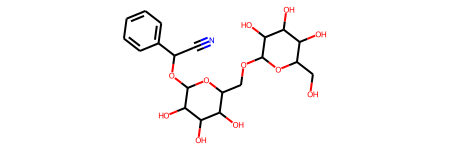

In [ ]:
smiles_ = sample_molecule["smiles"]

print("SMILES Representation :", smiles_)
print(smiles_to_iupac(smiles_))
molecule_diagram = Chem.MolFromSmiles(smiles_)
molecule_diagram

#### These are the 9-dimensional feature vector for each atom(node) in this particular molecule(graph)

In [8]:
sample_molecule.x

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

#### And obviously the target feature represents water solubility.

In [ ]:
sample_molecule.y

tensor([[-0.7700]])

## Model Architecture

![](https://ars.els-cdn.com/content/image/1-s2.0-S0893608020303531-gr1.jpg)


####Graph layers can be a little tricky to understand, However it all comes down to aggregation. We choose aggregation as it is permutation-invariant, which is very essential for graph networks. So let's try to break it down.


---

* #### At each step, each node's feature vector is updated based on the aggregation of it's neighbours feature vectors.
![](https://1fykyq3mdn5r21tpna3wkdyi-wpengine.netdna-ssl.com/wp-content/uploads/2019/12/image5-1.png)
#### As you can see W(k) and B(k) will be our weights and biases, that will be updated by the gradient update rule.

* #### But at this point, each node vectors only have information passing from their immediate neighbours. However as this step is repeated multiple times we will find even the nodes that are pretty distant in terms of edge connections, will have some information about each other due to this repeated message passing, which is almost similar to image convolutions.
![](https://miro.medium.com/max/875/1*0rj1Pxlzyqkg_rrZiyRDNw.png)


* #### Note, that too much message passing can cause a diffusion effect, where it smooths out the overall information so much that all node vectors look very much alike and this defeats the purpose of learning representations. Hence this number of iterations will largely depend on the data at hand. If the data is a very large network, then it will take a quite a number of convolutions for all the information to get aggregated locally.

* #### Finally, in our case where we want to do a graph level prediction, we aggregate the feature vectors of all the nodes and pass it through a dense layer for our final prediction.
![](http://snap.stanford.edu/decagon/decagon-overview.png)





In [11]:
import torch
from torch.nn import Linear
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool, global_max_pool
embedding_size = 64

class GraphNN(torch.nn.Module):
    def __init__(self):
        # Init parent
        super().__init__()
        torch.manual_seed(42)

        # GCN layers
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
        self.conv3 = GCNConv(embedding_size, embedding_size)

        # Output layer
        self.out = Linear(embedding_size*2, 1)

    def forward(self, x, edge_index, batch_index):
        # First Conv layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.tanh(hidden)

        # Other Conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)
          
        # Global Pooling (stack different aggregations)
        hidden = torch.cat([global_mean_pool(hidden, batch_index), 
                            global_max_pool(hidden, batch_index)], dim=1)

        # Apply a final (linear) classifier.
        out = self.out(hidden)

        return out, hidden

model = GraphNN()
print(model)

GraphNN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)


## Training

In [12]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

# Root mean squared error
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)  

# Use GPU for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Wrap data in a data loader
data_size = len(data)
NUM_GRAPHS_PER_BATCH = 64
loader = DataLoader(data[:int(data_size * 0.8)], 
                    batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(data[int(data_size * 0.8):], 
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

def train(data):
    # Enumerate over the data
    for batch in loader:
      # Use GPU
      batch.to(device)  
      # Reset gradients
      optimizer.zero_grad() 
      # Passing the node features and the connection info
      pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch) 
      # Calculating the loss and gradients
      loss = torch.sqrt(loss_fn(pred, batch.y))       
      loss.backward()  
      # Update using the gradients
      optimizer.step()   
    return loss, embedding

print("Starting training...")
losses = []
for epoch in range(3000):
    loss, h = train(data)
    losses.append(loss)
    if epoch % 100 == 0:
      print(f"Epoch {epoch} | Train Loss {loss}")

Starting training...
Epoch 0 | Train Loss 4.2998223304748535
Epoch 100 | Train Loss 1.1321296691894531
Epoch 200 | Train Loss 1.3891655206680298
Epoch 300 | Train Loss 0.7128598093986511
Epoch 400 | Train Loss 0.513134777545929
Epoch 500 | Train Loss 0.660555362701416
Epoch 600 | Train Loss 0.46846771240234375
Epoch 700 | Train Loss 0.7237585783004761
Epoch 800 | Train Loss 0.5254417657852173
Epoch 900 | Train Loss 0.9026287794113159
Epoch 1000 | Train Loss 0.5464653968811035
Epoch 1100 | Train Loss 0.437247633934021
Epoch 1200 | Train Loss 0.45861944556236267
Epoch 1300 | Train Loss 0.4017792344093323
Epoch 1400 | Train Loss 0.5448367595672607
Epoch 1500 | Train Loss 0.579160213470459
Epoch 1600 | Train Loss 0.2375866174697876
Epoch 1700 | Train Loss 0.2841548025608063
Epoch 1800 | Train Loss 0.41968628764152527
Epoch 1900 | Train Loss 0.8205571174621582
Epoch 2000 | Train Loss 0.3977542221546173
Epoch 2100 | Train Loss 0.41123056411743164
Epoch 2200 | Train Loss 0.5435051321983337
Ep

# Evaluating Model

In [13]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Analyze the results for one batch
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch) 
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df['error'] = abs(df['y_real']-df['y_pred'])
mean_accuracy = df['error'].mean()

In [14]:
df.head()

,y_real,y_pred,error
0,-3.900,-2.990808,0.909192
1,-0.742,-0.649032,0.092968
2,-1.380,-1.494236,0.114236
3,-3.246,-2.835510,0.410490
4,-2.120,-2.193582,0.073582


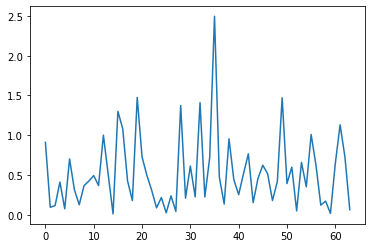

In [15]:
df['error'].plot()

In [16]:
print(f"Mean Accuracy : {mean_accuracy}")

Mean Accuracy : 0.5256589867640287


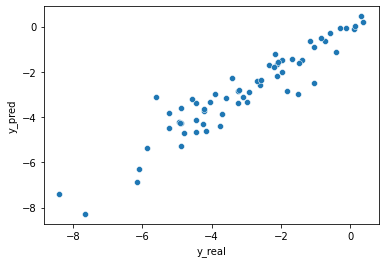

In [17]:
sns.scatterplot(data=df, x="y_real", y="y_pred")